In [1]:
import tensorflow as tf 
from tensorflow import keras
import numpy as np

In [4]:
tf.__version__

'2.10.1'

In [5]:
keras.__version__

'2.10.0'

In [6]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
training_dataset = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",  # Change label_mode to "categorical" for multi-class classification
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


In [7]:
training_dataset

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [8]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [9]:
for x,y in training_dataset:
    print(x)
    print(y)
    break

tf.Tensor(
[[[[161.75 154.75 148.75]
   [167.   160.   154.  ]
   [171.5  164.5  158.5 ]
   ...
   [173.5  166.5  160.5 ]
   [173.5  166.5  160.5 ]
   [172.5  165.5  159.5 ]]

  [[163.   156.   150.  ]
   [165.25 158.25 152.25]
   [166.5  159.5  153.5 ]
   ...
   [172.75 165.75 159.75]
   [172.75 165.75 159.75]
   [171.5  164.5  158.5 ]]

  [[164.25 157.25 151.25]
   [163.75 156.75 150.75]
   [163.5  156.5  150.5 ]
   ...
   [173.25 166.25 160.25]
   [173.25 166.25 160.25]
   [172.   165.   159.  ]]

  ...

  [[125.   120.   117.  ]
   [113.   108.   105.  ]
   [107.   102.    99.  ]
   ...
   [133.25 128.25 125.25]
   [134.5  129.5  126.5 ]
   [132.75 127.75 124.75]]

  [[122.75 117.75 114.75]
   [113.75 108.75 105.75]
   [115.75 110.75 107.75]
   ...
   [136.75 131.75 128.75]
   [131.75 126.75 123.75]
   [133.75 128.75 125.75]]

  [[116.5  111.5  108.5 ]
   [119.5  114.5  111.5 ]
   [127.5  122.5  119.5 ]
   ...
   [140.25 135.25 132.25]
   [138.5  133.5  130.5 ]
   [132.5  127.5  12

In [10]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [11]:
model = Sequential()

In [12]:
### adding convolusion layer


In [13]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [14]:
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [15]:
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [16]:
# model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
# model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
# model.add(MaxPool2D(pool_size=2, strides=2))

In [17]:
# model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
# model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
# model.add(MaxPool2D(pool_size=2, strides=2))

In [18]:
# model.add(Dropout(0.25))
## model is not underfitting

In [19]:
model.add(Flatten())

In [20]:
model.add(Dense(units=1500,activation='relu'))

In [21]:
# model.add(Dropout(0.4))
### model is not under fitting

In [22]:
model.add(Dense(units=38,activation='softmax'))

In [23]:
## model compile

In [24]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                    

In [205]:
traingin_history = model.fit(x = training_dataset ,validation_data = validation_dataset ,epochs=10) 

Epoch 1/10


2197/2197 [==============================] - 118s 53ms/step - loss: 1.0698 - accuracy: 0.7064 - val_loss: 0.4497 - val_accuracy: 0.8556
Epoch 2/10
2197/2197 [==============================] - 125s 57ms/step - loss: 0.3473 - accuracy: 0.8883 - val_loss: 0.4242 - val_accuracy: 0.8685
Epoch 3/10
2197/2197 [==============================] - 137s 62ms/step - loss: 0.2231 - accuracy: 0.9281 - val_loss: 0.3034 - val_accuracy: 0.9082
Epoch 4/10
2197/2197 [==============================] - 118s 54ms/step - loss: 0.1699 - accuracy: 0.9448 - val_loss: 0.3129 - val_accuracy: 0.9142
Epoch 5/10
2197/2197 [==============================] - 114s 52ms/step - loss: 0.1358 - accuracy: 0.9566 - val_loss: 0.4119 - val_accuracy: 0.8965
Epoch 6/10
2197/2197 [==============================] - 113s 51ms/step - loss: 0.1250 - accuracy: 0.9607 - val_loss: 0.4496 - val_accuracy: 0.8908
Epoch 7/10
2197/2197 [==============================] - 111s 50ms/step - loss: 0.1181 - accuracy: 0.9634 - val_loss: 0.4682 - val

In [206]:
training_history = traingin_history

In [207]:
train_acc , train_loss = model.evaluate(training_dataset)

2197/2197 [==============================] - 38s 17ms/step - loss: 0.0958 - accuracy: 0.9702


In [208]:
print(train_acc , train_loss)

0.09576242417097092 0.97022545337677


In [209]:
valid_acc,valid_loss = model.evaluate(validation_dataset)

550/550 [==============================] - 11s 20ms/step - loss: 0.4737 - accuracy: 0.8919


In [210]:
print(valid_acc,valid_loss)

0.47369256615638733 0.8918734192848206


In [211]:
## saving the model

In [212]:
###model.save('PlantDiseaseModel.h5')

In [213]:
###model.save('PlantDiseaseModel.keras')

visualisation of accuracy

In [214]:
training_history.history

{'loss': [1.069813847541809,
  0.34725674986839294,
  0.2230861485004425,
  0.1699240356683731,
  0.135846346616745,
  0.12501326203346252,
  0.11809656023979187,
  0.11032095551490784,
  0.10181626677513123,
  0.09609898179769516],
 'accuracy': [0.7064229249954224,
  0.8882708549499512,
  0.9281172156333923,
  0.9448466897010803,
  0.956568717956543,
  0.9607226848602295,
  0.9633544087409973,
  0.9665694832801819,
  0.9701685905456543,
  0.971932590007782],
 'val_loss': [0.4497023820877075,
  0.4241756200790405,
  0.3033958971500397,
  0.312920480966568,
  0.41191211342811584,
  0.44955185055732727,
  0.46821796894073486,
  0.3688713014125824,
  0.4550260901451111,
  0.47369226813316345],
 'val_accuracy': [0.8556225895881653,
  0.86854088306427,
  0.9082062244415283,
  0.914181649684906,
  0.8965399265289307,
  0.8908490538597107,
  0.8922148942947388,
  0.9091736674308777,
  0.8903937935829163,
  0.8918734192848206]}

In [215]:
import matplotlib.pyplot as plt

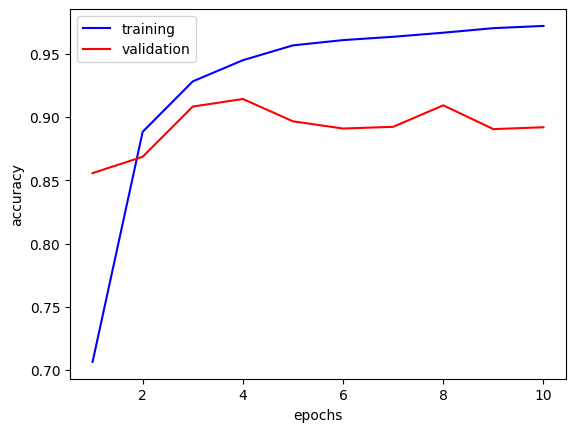

In [216]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='blue',label = 'training')
plt.plot(epochs,training_history.history['val_accuracy'], color='red', label='validation')  # Added label for validation accuracy)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend() 
plt.show()

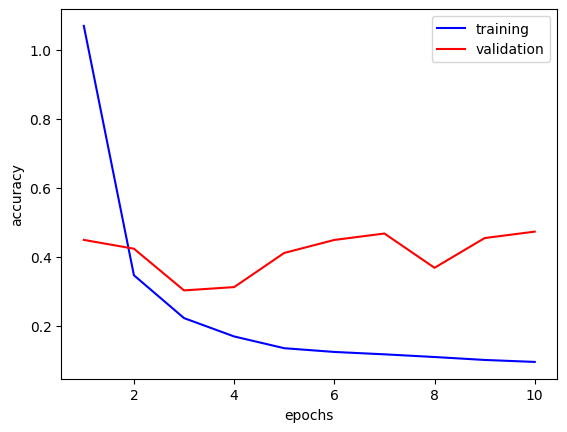

In [219]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['loss'],color='blue',label = 'training')
plt.plot(epochs,training_history.history['val_loss'], color='red', label='validation')  # Added label for validation accuracy)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend() 
plt.show()


In [217]:
test_dataset =  tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",  # Change label_mode to "categorical" for multi-class classification
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [218]:
y_pred = model.predict(test_dataset)

550/550 [==============================] - 10s 18ms/step
